In [1]:
# This Notebook used to build binary classification system to identifying the heart disease
# Source of dataset:https://www.geeksforgeeks.org/machine-learning/dataset-for-classification/
# This dataset contains: 569 instances with 30 features such as radius, texture, perimeter, and area of the nuclei.
#used to predict type of tumor as  benign or malignant
#1. Read Data
import pandas as pd
data=pd.read_csv("C:/Users/User/codveda_tasks/SVM_Task(Level3_task2)/heart-2.csv")


In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data['target'].unique()

array([0, 1])

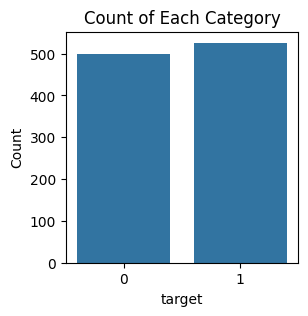

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a countplot
plt.figure(figsize=(3,3))
sns.countplot(x=data['target'], data=data)
plt.title('Count of Each Category')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

In [6]:
# the data is balanced and encoded and no null data so we dont need to preprocessing data(Just standarization)


In [7]:
#split data 
X=data.drop('target', axis=1)
y=data['target']


In [8]:
# Reduce feature space from 4 dimensions down to 2 making it easier to visualize
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [9]:
X_reduced

array([[-34.61508348,  18.62660347],
       [-42.62527444,   4.15863028],
       [-70.20184255, -29.36747739],
       ...,
       [ 27.99702926, -26.65019964],
       [  6.59023617,  12.52905198],
       [-57.96134212, -35.82058784]], shape=(1025, 2))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.25, random_state=1)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
# we noticed that scaling with not work efficient with RBF kernel, so we ignore it 

In [12]:
from sklearn import svm
clf = svm.SVC(kernel='linear')#Kernel: A function that maps data to a higher-dimensional space enabling SVM to handle non-linearly separable data.
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       130
           1       0.67      0.80      0.73       127

    accuracy                           0.70       257
   macro avg       0.71      0.71      0.70       257
weighted avg       0.71      0.70      0.70       257



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.70
Precision: 0.67
Recall: 0.80
F1-Score: 0.73


In [16]:
#Visualize dicision boundaried
#: Create Meshgrid
# From:https://www.geeksforgeeks.org/machine-learning/visualizing-classifier-decision-boundaries/
import numpy as np
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

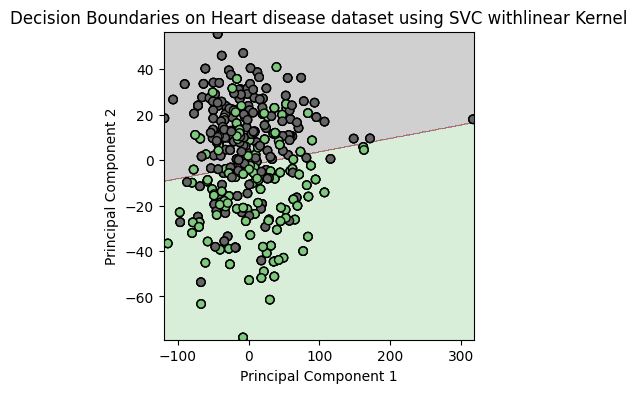

In [17]:
#Plot Decision Boundaries
plt.figure(figsize=(4,4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Accent)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', cmap=plt.cm.Accent)
plt.title("Decision Boundaries on Heart disease dataset using SVC withlinear Kernel")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [18]:
#SVC with RBF
rbf_clf = svm.SVC(kernel='rbf', gamma='scale')
rbf_clf.fit(X_train,y_train)

SVC()

In [19]:
rbf_y_pred = rbf_clf.predict(X_test)

In [20]:
print(classification_report(y_test, rbf_y_pred ))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62       130
           1       0.63      0.81      0.71       127

    accuracy                           0.67       257
   macro avg       0.68      0.67      0.66       257
weighted avg       0.69      0.67      0.66       257



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, rbf_y_pred)
precision = precision_score(y_test, rbf_y_pred)
recall = recall_score(y_test, rbf_y_pred)
f1 = f1_score(y_test,rbf_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.67
Precision: 0.63
Recall: 0.81
F1-Score: 0.71


In [22]:
# Mesh for rbf kernel
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z2 = rbf_clf.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z2 = Z2.reshape(xx2.shape)

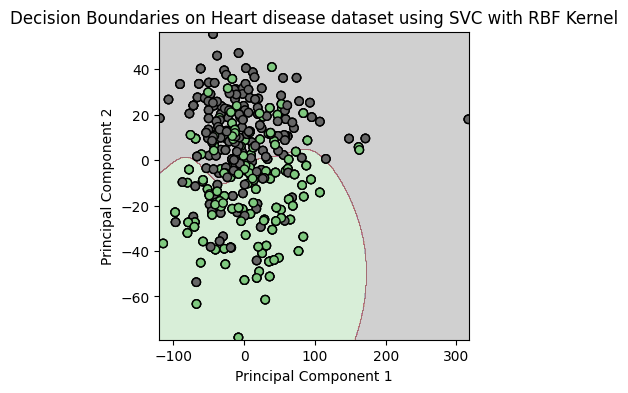

In [23]:
#Plot Decision Boundaries
plt.figure(figsize=(4,4))
plt.contourf(xx2, yy2, Z2, alpha=0.3, cmap=plt.cm.Accent)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', cmap=plt.cm.Accent)
plt.title("Decision Boundaries on Heart disease dataset using SVC with RBF Kernel")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()